# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Base url and query info for weather API
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#Create lists to hold weather information
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
cities_reordered = []
lat = []
long = []

#Set counters starting value
index_counter = 0
city_counter = 1

print("Query for data has started.")

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        #Retreiving data and converting to a JSON
        response = requests.get(query_url + city).json()
        
        #Add values for each city to corresponding list about weather
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        cities_reordered.append(response["name"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        
        #Group cities in sets of 50
        if index_counter > 49:
            index_counter = 0
            city_counter = city_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {city_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

        
print("Query for data has started.")

Query for data has started.
Processing Record 1 of Set 1 : bredasdorp
Processing Record 2 of Set 1 : atbasar
Processing Record 3 of Set 1 : vaini
Processing Record 4 of Set 1 : port hedland
Processing Record 5 of Set 1 : hobart
Processing Record 6 of Set 1 : bluff
Processing Record 7 of Set 1 : ponta do sol
Processing Record 8 of Set 1 : port elizabeth
City not found. Skipping...
Processing Record 9 of Set 1 : cap malheureux
Processing Record 10 of Set 1 : lebu
Processing Record 11 of Set 1 : castro
Processing Record 12 of Set 1 : bilibino
Processing Record 13 of Set 1 : burnie
Processing Record 14 of Set 1 : najran
Processing Record 15 of Set 1 : tongzi
Processing Record 16 of Set 1 : severo-kurilsk
City not found. Skipping...
Processing Record 17 of Set 1 : barrow
Processing Record 18 of Set 1 : albany
Processing Record 19 of Set 1 : mataura
Processing Record 20 of Set 1 : west wendover
Processing Record 21 of Set 1 : san patricio
Processing Record 22 of Set 1 : puerto ayora
Processi

Processing Record 38 of Set 4 : dharchula
Processing Record 39 of Set 4 : honiara
Processing Record 40 of Set 4 : geraldton
Processing Record 41 of Set 4 : cabo san lucas
Processing Record 42 of Set 4 : cayenne
Processing Record 43 of Set 4 : zhigansk
Processing Record 44 of Set 4 : spirit river
Processing Record 45 of Set 4 : tilichiki
Processing Record 46 of Set 4 : menomonie
Processing Record 47 of Set 4 : sabang
Processing Record 48 of Set 4 : angoche
City not found. Skipping...
Processing Record 49 of Set 4 : turochak
Processing Record 50 of Set 4 : manzhouli
Processing Record 0 of Set 5 : troitskoye
Processing Record 1 of Set 5 : bandarbeyla
Processing Record 2 of Set 5 : mount gambier
Processing Record 3 of Set 5 : ahipara
Processing Record 4 of Set 5 : new norfolk
Processing Record 5 of Set 5 : tabuk
Processing Record 6 of Set 5 : inhambane
Processing Record 7 of Set 5 : banda aceh
Processing Record 8 of Set 5 : broome
Processing Record 9 of Set 5 : pagudpud
Processing Record 1

Processing Record 25 of Set 8 : san nicolas
Processing Record 26 of Set 8 : zelenoborskiy
Processing Record 27 of Set 8 : gera
Processing Record 28 of Set 8 : methoni
Processing Record 29 of Set 8 : vila do maio
Processing Record 30 of Set 8 : byron bay
Processing Record 31 of Set 8 : arlit
Processing Record 32 of Set 8 : east wenatchee bench
Processing Record 33 of Set 8 : yar-sale
Processing Record 34 of Set 8 : ayan
Processing Record 35 of Set 8 : osa
Processing Record 36 of Set 8 : abu dhabi
Processing Record 37 of Set 8 : laje
Processing Record 38 of Set 8 : kyra
Processing Record 39 of Set 8 : buraydah
Processing Record 40 of Set 8 : sandwick
Processing Record 41 of Set 8 : lazarev
Processing Record 42 of Set 8 : peniche
Processing Record 43 of Set 8 : port hardy
Processing Record 44 of Set 8 : alugan
Processing Record 45 of Set 8 : senno
Processing Record 46 of Set 8 : nan
Processing Record 47 of Set 8 : la plaine
Processing Record 48 of Set 8 : atasu
Processing Record 49 of Set

Processing Record 11 of Set 12 : hamilton
Processing Record 12 of Set 12 : ponta pora
Processing Record 13 of Set 12 : ingham
Processing Record 14 of Set 12 : seoul
Processing Record 15 of Set 12 : lodja
Processing Record 16 of Set 12 : muscat
City not found. Skipping...
Processing Record 17 of Set 12 : wakkanai
City not found. Skipping...
Processing Record 18 of Set 12 : shitanjing
Processing Record 19 of Set 12 : rio grande
Processing Record 20 of Set 12 : matagami
Processing Record 21 of Set 12 : troyes
Processing Record 22 of Set 12 : ducheng
City not found. Skipping...
Processing Record 23 of Set 12 : hashtrud
Processing Record 24 of Set 12 : koungheul
Processing Record 25 of Set 12 : bubaque
Processing Record 26 of Set 12 : catuday
Processing Record 27 of Set 12 : sakakah
Query for data has started.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create a DataFrame from Weather Data pulled
weather = pd.DataFrame({"City" : cities_reordered,
                "Country" : country,
                "Date" : date,
                "Lat" : lat,
                "Lng" : long,
                "Cloudiness" : cloudiness,
                "Humidity" : humidity,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed})
#Display DataFrame
weather

,City,Country,Date,Lat,Lng,Cloudiness,Humidity,Max Temp,Wind Speed
0,Bredasdorp,ZA,1612488515,-34.5322,20.0403,4,88,62.60,3.44
1,Atbasar,KZ,1612489011,51.8000,68.3333,100,98,29.16,8.59
2,Vaini,TO,1612488496,-21.2000,-175.2000,90,89,82.40,8.05
3,Port Hedland,AU,1612488533,-20.3167,118.5667,70,72,83.80,9.66
4,Hobart,AU,1612488481,-42.8794,147.3294,75,73,81.00,19.57
...,...,...,...,...,...,...,...,...,...
583,Hashtrūd,IR,1612488918,37.4779,47.0508,100,91,33.82,0.36
584,Koungheul,SN,1612489092,13.9833,-14.8000,100,27,76.10,12.50
585,Bubaque,GW,1612489092,11.2833,-15.8333,58,67,77.41,14.54
586,Catuday,PH,1612488567,16.2923,119.8062,78,68,77.79,9.80


In [5]:
#Export Weather DataFrame to a CSV
weather.to_csv("../../output_data/cities_weather.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

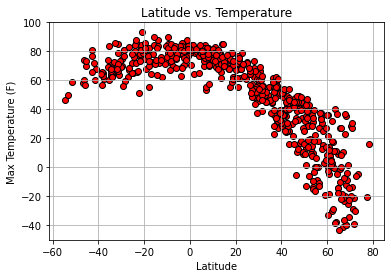

In [9]:
#Create a scatter plot of latitude vs. max temp
plt.scatter(weather["Lat"], weather["Max Temp"], facecolor="red", edgecolor="black" )
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
#Display scatter plot
plt.show()

## Latitude vs. Humidity Plot

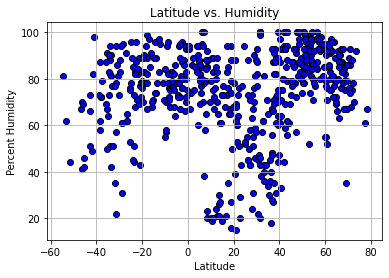

In [12]:
#Create a scatter plot of latitude vs. humidity
plt.scatter(weather["Lat"], weather["Humidity"], facecolor="blue", edgecolor="black" )
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Percent Humidity")
#Display scatter plot
plt.show()

## Latitude vs. Cloudiness Plot

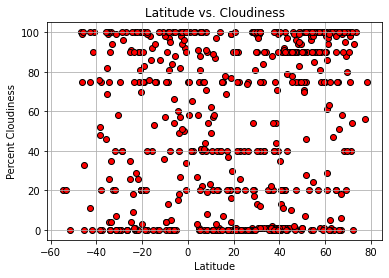

In [13]:
#Create a scatter plot of latitude vs. cloudiness
plt.scatter(weather["Lat"], weather["Cloudiness"], facecolor="red", edgecolor="black" )
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Percent Cloudiness")
#Display scatter plot
plt.show()

## Latitude vs. Wind Speed Plot

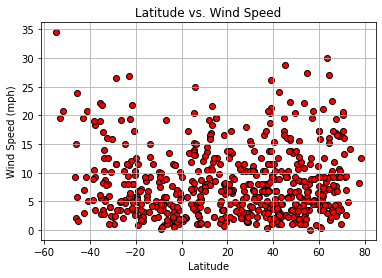

In [14]:
#Create a scatter plot of latitude vs. wind speed
plt.scatter(weather["Lat"], weather["Wind Speed"], facecolor="red", edgecolor="black" )
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#Display scatter plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression